# imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import logging 
import json
import time
import os 


# utilities

In [2]:
# class CustomFormatter(logging.Formatter):
#     def __init__(self, fmt=None, datefmt=None, style='%', custom_process=None):
#         super().__init__(fmt, datefmt, style)
#         self.custom_process = custom_process

#     def format(self, record):
#         record.custom_process = self.custom_process
#         return super().format(record)

# # custom_process_id = 'image_captions'
# formatter = CustomFormatter(
#     fmt='%(asctime)s - %(name)s - %(levelname)s - %(custom_process)s - %(message)s',
#     custom_process=custom_process_id
# )
# file_handler = logging.FileHandler('scicap_data_analysis.log')
# file_handler.setFormatter(formatter)
# # console_handler = logging.StreamHandler()
# # console_handler.setFormatter(formatter)
# logging.basicConfig(
#     level=logging.DEBUG,
#     handlers=[file_handler], #console_handler
# )

# logger = logging.getLogger(__name__)


In [3]:
logging.basicConfig(
    level=logging.DEBUG,  
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', 
    handlers=[
        logging.FileHandler('logfile.log'),  
        # logging.StreamHandler()  
    ]
)

logger = logging.getLogger(__name__)

# directories and sub directories

In [4]:
print("{os.listdir()}")

{os.listdir()}


In [5]:
print(os.listdir('List-of-Files-for-Each-Experiments'))


['.DS_Store', 'First-Sentence', 'Caption-No-More-Than-100-Tokens', 'Single-Sentence-Caption']


In [6]:
print(os.listdir('List-of-Files-for-Each-Experiments/First-Sentence'))

['No-Subfig', 'Yes-Subfig']


In [7]:
print(os.listdir('List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig'))


['test', 'train', 'val']


In [8]:
print(os.listdir('List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/test'))


['file_idx.json']


In [9]:
print(os.listdir('List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/train'))


['file_idx.json']


In [10]:
print(os.listdir('List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/val'))

['file_idx.json']


In [11]:
def read_json(path):
    with open(path,'r') as f:
        json_f = json.load(f)
        return json_f

In [12]:
file_idx_test = read_json('List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/test/file_idx.json')
file_idx_train = read_json('List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/train/file_idx.json')
file_idx_val = read_json('List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/val/file_idx.json')

In [13]:
file_idx_test
file_idx_train
file_idx_val


['1001.0317v2-Figure2-1.png',
 '1001.0361v2-Figure5-1.png',
 '1001.1026v1-Figure6-1.png',
 '1001.1298v1-Figure6-1.png',
 '1001.1603v1-Figure9-1.png',
 '1001.1872v1-Figure1-1.png',
 '1001.1872v1-Figure3-1.png',
 '1001.1896v2-Figure3-1.png',
 '1001.1902v2-Figure4-1.png',
 '1001.2228v2-Figure6-1.png',
 '1001.2250v1-Figure6-1.png',
 '1001.2272v1-Figure3-1.png',
 '1001.2283v1-Figure2-1.png',
 '1001.2283v1-Figure3-1.png',
 '1001.2320v1-Figure4-1.png',
 '1001.2376v1-Figure5-1.png',
 '1001.2411v1-Figure3-1.png',
 '1001.2503v1-Figure1-1.png',
 '1001.2625v2-Figure12-1.png',
 '1001.2848v1-Figure1-1.png',
 '1001.3173v2-Figure7-1.png',
 '1001.3193v1-Figure7-1.png',
 '1001.3225v1-Figure6-1.png',
 '1001.3246v1-Figure3-1.png',
 '1001.3246v1-Figure8-1.png',
 '1001.3673v1-Figure7-1.png',
 '1001.3744v1-Figure8-1.png',
 '1001.4108v2-Figure7-1.png',
 '1001.4122v1-Figure7-1.png',
 '1001.4301v1-Figure17-1.png',
 '1001.4301v1-Figure6-1.png',
 '1001.4423v1-Figure2-1.png',
 '1001.4432v3-Figure2-1.png',
 '1001.4

In [14]:
print(os.listdir('List-of-Files-for-Each-Experiments/Caption-No-More-Than-100-Tokens/Yes-Subfig'))


['test', 'train', 'val']


In [15]:
print(os.listdir('List-of-Files-for-Each-Experiments/Caption-No-More-Than-100-Tokens/No-Subfig'))

['.DS_Store', 'test', 'train', 'val']


In [16]:
print(os.listdir('List-of-Files-for-Each-Experiments/Caption-No-More-Than-100-Tokens/No-Subfig/train'))

['file_idx.json']


# SciCap-Caption-All

In [17]:
print(os.listdir('SciCap-Caption-All'))

['test', 'train', 'val']


In [18]:
print(os.listdir('SciCap-Caption-All/train')[:10])

['1803.07821v1-Figure2-1.json', '1607.08220v1-Figure4-1.json', '2002.03746v1-Figure10-1.json', '1312.0042v1-Figure9-1.json', '1704.03939v1-Figure3-1.json', '2010.05031v1-Figure4-1.json', '1308.3558v1-Figure1-1.json', '1901.03115v1-Figure7-1.json', '2008.08847v1-Figure6-1.json', '1508.03601v1-Figure4-1.json']


In [19]:
print(os.listdir ('SciCap-Caption-All/val')[:10])


['2008.00584v1-Figure2-1.json', '1908.01292v2-Figure3-1.json', '1406.2392v1-Figure4-1.json', '2006.15946v1-Figure5-1.json', '1410.6909v1-Figure14-1.json', '1912.07366v1-Figure2-1.json', '1611.08728v1-Figure2-1.json', '1702.03907v1-Figure7-1.json', '1809.00232v1-Figure4-1.json', '2009.04338v1-Figure6-1.json']


In [20]:
with open("SciCap-Caption-All/train/1607.08220v1-Figure4-1.json",'r') as file:
    test_ = json.load(file)

In [21]:
len(test_)

8

In [22]:
test_.keys()

dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type', '0-originally-extracted', '1-lowercase-and-token-and-remove-figure-index', '2-normalized'])

In [23]:
test_.keys()


dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type', '0-originally-extracted', '1-lowercase-and-token-and-remove-figure-index', '2-normalized'])

In [24]:
test_['contains-subfigure']


True

# meta data for all the papers used to create the data set

In [24]:
meta_data = []
with open("arxiv-metadata-oai-snapshot.json", "r") as file:
    for line in file:
        try:
            data = json.loads(line)
            meta_data.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")



In [25]:
meta_data[0] # data for papers 

{'id': '0704.0001',
 'submitter': 'Pavel Nadolsky',
 'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
 'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
 'comments': '37 pages, 15 figures; published version',
 'journal-ref': 'Phys.Rev.D76:013009,2007',
 'doi': '10.1103/PhysRevD.76.013009',
 'report-no': 'ANL-HEP-PR-07-12',
 'categories': 'hep-ph',
 'license': None,
 'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from th

# sample image 

In [25]:
print(os.listdir())

['.DS_Store', 'List-of-Files-for-Each-Experiments', 'logfile.log', 'SciCap-Caption-All', 'arxiv-metadata-oai-snapshot.json', '.ipynb_checkpoints', 'data_analysis.ipynb', 'SciCap-No-Subfig-Img', 'SciCap-Yes-Subfig-Img']


In [26]:
print(os.listdir('SciCap-No-Subfig-Img'))

['test', 'train', 'val']


In [27]:
print(os.listdir('SciCap-No-Subfig-Img/train')[:10])

['2002.09106v1-Figure4-1.png', '2003.14069v1-Figure4-1.png', '1911.09143v1-Figure5-1.png', '1612.01506v1-Figure5-1.png', '1411.7101v1-Figure4-1.png', '1606.00478v1-Figure2-1.png', '1210.0160v2-Figure12-1.png', '2004.00414v1-Figure7-1.png', '1706.02798v1-Figure7-1.png', '1507.00695v2-Figure4-1.png']


In [28]:
image_file = '1411.7101v1-Figure4-1.png'
image_base = os.path.splitext(image_file)[0]
print(image_base)

1411.7101v1-Figure4-1


In [29]:
for file in file_idx_train:
    if file == image_file:
        print(file)

1411.7101v1-Figure4-1.png


In [30]:
img = plt.imread(f"SciCap-No-Subfig-Img/train/{image_file}")

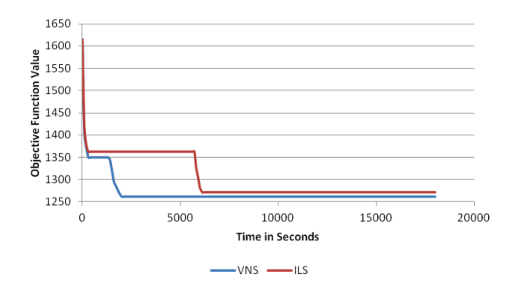

In [31]:
plt.imshow(img)
plt.axis('off')
plt.show()

## caption of above image

In [32]:
# image_file
# for captions in os.walk()
for root, direc , files in os.walk("."):
    # print(root)
    # print(file)
    if root == "./SciCap-Caption-All/train":
        for f in files:
            # print(type(f))
            if f.endswith(".json"):
                file_base = os.path.splitext(f)[0]
                # print(f)
                # f_ = f.split(".")[0]
                # print(f_)
                # imf_ = image_file.split(".")[0]
                # print(imf_)
                if file_base == image_base:
                    print(f"Found matching file: {os.path.join(root, f)}")
                    json_match_path = os.path.join(root,f)

if json_match_path:
    with open(json_match_path,'r') as f:
        json_match = json.load(f)
        print(json_match.keys())
        

Found matching file: ./SciCap-Caption-All/train/1411.7101v1-Figure4-1.json
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type', '0-originally-extracted', '1-lowercase-and-token-and-remove-figure-index', '2-normalized'])


In [33]:
json_match['contains-subfigure']

False

In [34]:
json_match['Img-text']

[]

In [35]:
json_match['paper-ID']

'1411.7101v1'

In [36]:
json_match['figure-ID']

'1411.7101v1-Figure4-1.png'

In [37]:
json_match['figure-type']

'Graph Plot'

In [38]:
json_match['0-originally-extracted']

'Figure 4: Convergence of Instance C18 over a computational time limit of 5 hours'

In [39]:
json_match['1-lowercase-and-token-and-remove-figure-index']

{'caption': 'convergence of instance c18 over a computational time limit of 5 hours .',
 'sentence': ['convergence of instance c18 over a computational time limit of 5 hours .'],
 'token': ['convergence',
  'of',
  'instance',
  'c18',
  'over',
  'a',
  'computational',
  'time',
  'limit',
  'of',
  '5',
  'hours',
  '.']}

In [40]:
json_match['2-normalized']

{'2-1-basic-num': {'caption': 'convergence of instance c18 over a computational time limit of NUM-TK hours .',
  'sentence': ['convergence of instance c18 over a computational time limit of NUM-TK hours .'],
  'token': ['convergence',
   'of',
   'instance',
   'c18',
   'over',
   'a',
   'computational',
   'time',
   'limit',
   'of',
   'NUM-TK',
   'hours',
   '.']},
 '2-2-advanced-euqation-bracket': {'caption': 'convergence of instance c18 over a computational time limit of NUM hours .',
  'sentence': ['convergence of instance c18 over a computational time limit of NUM hours .'],
  'tokens': ['convergence',
   'of',
   'instance',
   'c18',
   'over',
   'a',
   'computational',
   'time',
   'limit',
   'of',
   'NUM',
   'hours',
   '.']}}

# caption meta data 

In [41]:
root = [x for x in os.listdir() if x == "SciCap-Caption-All"][0]
root

'SciCap-Caption-All'

In [42]:
total_number_of_files = 0
final_key_count = {}
captions_meta_data = pd.DataFrame()

captions_meta_data_list = []
        
for r, d, files in os.walk(root):
    for f in tqdm(files):
        logger.info(f"Picked up file ---{f}")
        try:
            if f.endswith(".json"):
                json_f = read_json(os.path.join(r, f))
                if total_number_of_files == 0:
                    captions_meta_data = pd.DataFrame(columns=json_f.keys())
                captions_meta_data_list.append(json_f)
                total_number_of_files += 1
        except Exception as e:
            logger.error(f"Exception occurred for file ref --{f}: {e}")

if captions_meta_data_list:
    captions_meta_data = pd.concat([pd.DataFrame([data]) for data in captions_meta_data_list], ignore_index=True)



0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████| 41680/41680 [00:09<00:00, 4331.20it/s]


In [43]:
captions_meta_data.head(5)

,contains-subfigure,Img-text,paper-ID,figure-ID,figure-type,0-originally-extracted,1-lowercase-and-token-and-remove-figure-index,2-normalized
0,True,"[box, without, box, S, E, R, M, 0.12, 0.1, 0.0...",2006.00601v2,2006.00601v2-Figure7-1.png,Graph Plot,Figure 7. The effects of the box constraint in...,{'caption': 'the effects of the box constraint...,{'2-1-basic-num': {'caption': 'the effects of ...
1,True,"[one, MPI, process, per, node, one, MPI, proce...",1106.5908v1,1106.5908v1-Figure10-1.png,Graph Plot,Figure 10: Strong scaling performance data for...,{'caption': 'strong scaling performance data f...,{'2-1-basic-num': {'caption': 'strong scaling ...
2,True,"[(p), Result, 8, Lineage size , w.r.t. Scal...",1412.1069v1,1412.1069v1-Figure5-1.png,Graph Plot,Figure 5: Timing results: (a)-(c) For increasi...,{'caption': 'timing results : ( a ) - ( c ) fo...,{'2-1-basic-num': {'caption': 'timing results ...
3,False,"[The, partial, offloading, mode, The, binary, ...",1806.04589v2,1806.04589v2-Figure4-1.png,Graph Plot,Fig. 4: The weighted sum computation bits of a...,{'caption': 'the weighted sum computation bits...,{'2-1-basic-num': {'caption': 'the weighted su...
4,False,"[ηharqK,4(snr), η5(snr), ηharqK,5(snr), η4(snr...",1606.05177v1,1606.05177v1-Figure3-1.png,Graph Plot,"Fig. 3. In slow-fading channels, decision regi...","{'caption': 'in slow-fading channels , decisio...",{'2-1-basic-num': {'caption': 'in slow-fading ...


In [44]:
captions_meta_data.shape

(416804, 8)

In [45]:
captions_meta_data.columns

Index(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID',
       'figure-type', '0-originally-extracted',
       '1-lowercase-and-token-and-remove-figure-index', '2-normalized'],
      dtype='object')

# Type of images 

In [48]:
captions_meta_data.to_excel("captions_meta_data_19_may_24.xlsx",index=False)

In [49]:
captions_meta_data['contains-subfigure'].value_counts()

contains-subfigure
True     283261
False    133543
Name: count, dtype: int64

In [50]:
captions_meta_data['figure-type'].value_counts()

figure-type
Graph Plot    416804
Name: count, dtype: int64

In [52]:
captions_meta_data.isna().sum()

contains-subfigure                               0
Img-text                                         0
paper-ID                                         0
figure-ID                                        0
figure-type                                      0
0-originally-extracted                           0
1-lowercase-and-token-and-remove-figure-index    0
2-normalized                                     0
dtype: int64

In [11]:
total_number_of_files = 0
final_key_count = {}
captions_meta_data = pd.DataFrame()
def read_json(path):
    with open(path,'r') as f:
        json_f = json.load(f)
        return json_f
        
for r,d,files in os.walk(root):
    print(type(files))
    for f in tqdm(files[0:4]):
        # print(f)
        logger.info(f"Picked up file ---{f}")
        try:
            if f.endswith(".json"):
                json_f = read_json(os.path.join(r,f))
                file_key_list = list(json_f.keys())
                logger.info(f"keys count ---{len(file_key_list)}")
                
                for k in file_key_list:
                    print("------------0------------")
                    print(k)
                    print(final_key_count.keys())
                    if k not in list(final_key_count.keys()):
                        final_key_count[k] = 1
                        print("--------1----------")
                        print(final_key_count)
                    else:
                        print("--------2----------")
                        
                        final_key_count[k] +=1
                        print(final_key_count)
                total_number_of_files += 1
        except exception as e:
            # print(f"Exception occured for file ref --{f}")
            logger.error(f"Exception occured for file ref --{f}")
            
    

<class 'list'>


0it [00:00, ?it/s]


<class 'list'>


  0%|                                                                                                         | 0/4 [00:00<?, ?it/s]2024-05-19 16:03:44,655 - __main__ - INFO - image_captions - Picked up file ---2006.00601v2-Figure7-1.json
2024-05-19 16:03:44,656 - __main__ - INFO - image_captions - keys count ---8
2024-05-19 16:03:44,657 - __main__ - INFO - image_captions - Picked up file ---1106.5908v1-Figure10-1.json
2024-05-19 16:03:44,658 - __main__ - INFO - image_captions - keys count ---8
2024-05-19 16:03:44,659 - __main__ - INFO - image_captions - Picked up file ---1412.1069v1-Figure5-1.json
2024-05-19 16:03:44,660 - __main__ - INFO - image_captions - keys count ---8
2024-05-19 16:03:44,661 - __main__ - INFO - image_captions - Picked up file ---1806.04589v2-Figure4-1.json
2024-05-19 16:03:44,662 - __main__ - INFO - image_captions - keys count ---8
100%|████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 549.32it/s]

------------0------------
contains-subfigure
dict_keys([])
--------1----------
{'contains-subfigure': 1}
------------0------------
Img-text
dict_keys(['contains-subfigure'])
--------1----------
{'contains-subfigure': 1, 'Img-text': 1}
------------0------------
paper-ID
dict_keys(['contains-subfigure', 'Img-text'])
--------1----------
{'contains-subfigure': 1, 'Img-text': 1, 'paper-ID': 1}
------------0------------
figure-ID
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID'])
--------1----------
{'contains-subfigure': 1, 'Img-text': 1, 'paper-ID': 1, 'figure-ID': 1}
------------0------------
figure-type
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID'])
--------1----------
{'contains-subfigure': 1, 'Img-text': 1, 'paper-ID': 1, 'figure-ID': 1, 'figure-type': 1}
------------0------------
0-originally-extracted
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type'])
--------1----------
{'contains-subfigure': 1, 'Img-text': 1, 'paper-

<class 'list'>


  0%|                                                                                                         | 0/4 [00:00<?, ?it/s]2024-05-19 16:03:45,024 - __main__ - INFO - image_captions - Picked up file ---1803.07821v1-Figure2-1.json
2024-05-19 16:03:45,025 - __main__ - INFO - image_captions - keys count ---8
2024-05-19 16:03:45,026 - __main__ - INFO - image_captions - Picked up file ---1607.08220v1-Figure4-1.json
2024-05-19 16:03:45,026 - __main__ - INFO - image_captions - keys count ---8
2024-05-19 16:03:45,027 - __main__ - INFO - image_captions - Picked up file ---2002.03746v1-Figure10-1.json
2024-05-19 16:03:45,028 - __main__ - INFO - image_captions - keys count ---8
2024-05-19 16:03:45,029 - __main__ - INFO - image_captions - Picked up file ---1312.0042v1-Figure9-1.json
2024-05-19 16:03:45,030 - __main__ - INFO - image_captions - keys count ---8
100%|████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 621.70it/s]

------------0------------
contains-subfigure
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type', '0-originally-extracted', '1-lowercase-and-token-and-remove-figure-index', '2-normalized'])
--------2----------
{'contains-subfigure': 5, 'Img-text': 4, 'paper-ID': 4, 'figure-ID': 4, 'figure-type': 4, '0-originally-extracted': 4, '1-lowercase-and-token-and-remove-figure-index': 4, '2-normalized': 4}
------------0------------
Img-text
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type', '0-originally-extracted', '1-lowercase-and-token-and-remove-figure-index', '2-normalized'])
--------2----------
{'contains-subfigure': 5, 'Img-text': 5, 'paper-ID': 4, 'figure-ID': 4, 'figure-type': 4, '0-originally-extracted': 4, '1-lowercase-and-token-and-remove-figure-index': 4, '2-normalized': 4}
------------0------------
paper-ID
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type', '0-originally-extracted', 

  0%|                                                                                                         | 0/4 [00:00<?, ?it/s]2024-05-19 16:03:45,082 - __main__ - INFO - image_captions - Picked up file ---2008.00584v1-Figure2-1.json
2024-05-19 16:03:45,083 - __main__ - INFO - image_captions - keys count ---8
2024-05-19 16:03:45,084 - __main__ - INFO - image_captions - Picked up file ---1908.01292v2-Figure3-1.json
2024-05-19 16:03:45,085 - __main__ - INFO - image_captions - keys count ---8
2024-05-19 16:03:45,085 - __main__ - INFO - image_captions - Picked up file ---1406.2392v1-Figure4-1.json
2024-05-19 16:03:45,086 - __main__ - INFO - image_captions - keys count ---8
2024-05-19 16:03:45,086 - __main__ - INFO - image_captions - Picked up file ---2006.15946v1-Figure5-1.json
2024-05-19 16:03:45,087 - __main__ - INFO - image_captions - keys count ---8
100%|████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 786.33it/s]

------------0------------
contains-subfigure
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type', '0-originally-extracted', '1-lowercase-and-token-and-remove-figure-index', '2-normalized'])
--------2----------
{'contains-subfigure': 9, 'Img-text': 8, 'paper-ID': 8, 'figure-ID': 8, 'figure-type': 8, '0-originally-extracted': 8, '1-lowercase-and-token-and-remove-figure-index': 8, '2-normalized': 8}
------------0------------
Img-text
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type', '0-originally-extracted', '1-lowercase-and-token-and-remove-figure-index', '2-normalized'])
--------2----------
{'contains-subfigure': 9, 'Img-text': 9, 'paper-ID': 8, 'figure-ID': 8, 'figure-type': 8, '0-originally-extracted': 8, '1-lowercase-and-token-and-remove-figure-index': 8, '2-normalized': 8}
------------0------------
paper-ID
dict_keys(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID', 'figure-type', '0-originally-extracted', 

# Total number of images

In [53]:
print(f"Total number of images with not subfig--Train Set--{len(os.listdir('SciCap-No-Subfig-Img/train'))}")
train = len(os.listdir('SciCap-No-Subfig-Img/train'))

Total number of images with not subfig--Train Set--106834


In [54]:
print(f"Total number of images with not subfig--Test Set--{len(os.listdir('SciCap-No-Subfig-Img/test'))}")
test = len(os.listdir('SciCap-No-Subfig-Img/test'))

Total number of images with not subfig--Test Set--13355


In [55]:
print(f"Total number of images with not subfig--Val Set--{len(os.listdir('SciCap-No-Subfig-Img/val'))}")
val = len(os.listdir('SciCap-No-Subfig-Img/val'))

Total number of images with not subfig--Val Set--13354


In [56]:
print(f"Total number of images with subfig--Train Set--{len(os.listdir('SciCap-Yes-Subfig-Img/train'))}")
train_subfig = len(os.listdir('SciCap-Yes-Subfig-Img/train'))

Total number of images with subfig--Train Set--226608


In [57]:
print(f"Total number of images with subfig--Test Set--{len(os.listdir('SciCap-Yes-Subfig-Img/test'))}")
test_subfig = len(os.listdir('SciCap-Yes-Subfig-Img/test'))

Total number of images with subfig--Test Set--28327


In [58]:
print(f"Total number of images with subfig--Val Set--{len(os.listdir('SciCap-Yes-Subfig-Img/val'))}")
val_subfig = len(os.listdir('SciCap-Yes-Subfig-Img/val'))

Total number of images with subfig--Val Set--28326


In [59]:
total_images = train + test + val + train_subfig + test_subfig + val_subfig
print(f"Total images in the dataset --- {total_images}")

Total images in the dataset --- 416804
